# Feature Importance using random forest

imports

In [1]:
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import os 
from pathlib import Path

import pandas as pd
import numpy as np

In [2]:

# read dynamic path
base_dir = Path(os.getcwd()) / "implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

load data

In [3]:
rf_data_raw = pd.read_csv(data_dir/"COX1/COX1.csv")

#format data 
lookup = {'inactive':0,'active':1}

rf_data = {'data': np.array(rf_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in rf_data_raw.iloc[0:,-1]]),
             'feature_names': rf_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


train/test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(rf_data['data'], rf_data['target'],
                                                    test_size=0.3, random_state=4232)

fit classifier

In [5]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Feature importance based on mean decrease in impurity


In [6]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Plot features

Text(0, 0.5, 'Mean Accuracy decrease')

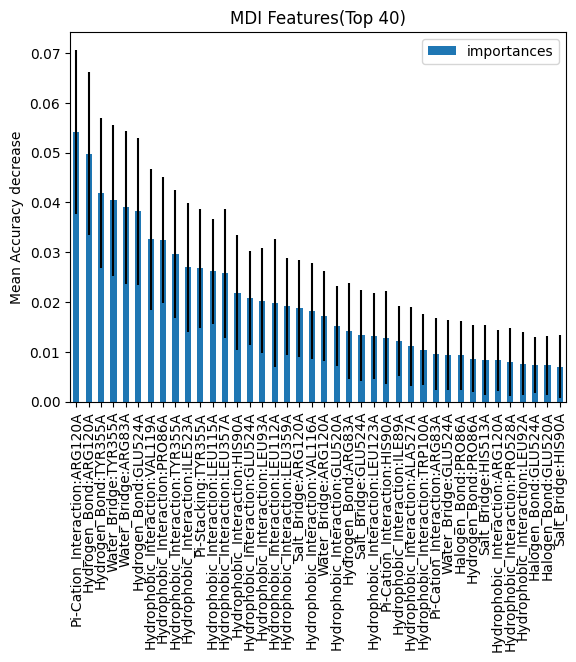

In [7]:
forest_importances = pd.DataFrame({"importances":importances}, index=rf_data_raw.columns[2:-1])
forest_importances["std"] = std
forest_importances_mdi = forest_importances.sort_values("importances",ascending=False).head(40)

fig, ax = plt.subplots()
forest_importances_mdi.plot.bar(y="importances", yerr="std",ax=ax)
ax.set_title("MDI Features(Top 40)")
ax.set_ylabel("Mean Accuracy decrease")

In [8]:
#save top features to new dataframe and to files

idx = list(forest_importances_mdi.index)

idx.append("LABEL")

filtered = rf_data_raw.filter(items=idx)
filtered.to_csv(data_dir/"COX1/cox1_mdi.csv",sep=",")

Feature Permutation

In [9]:

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=4232, n_jobs=-1
)

forest_importances = pd.DataFrame({"importances":result.importances_mean}, index=rf_data_raw.columns[2:-1])

display results

Text(0, 0.5, 'Mean Accuracy decrease')

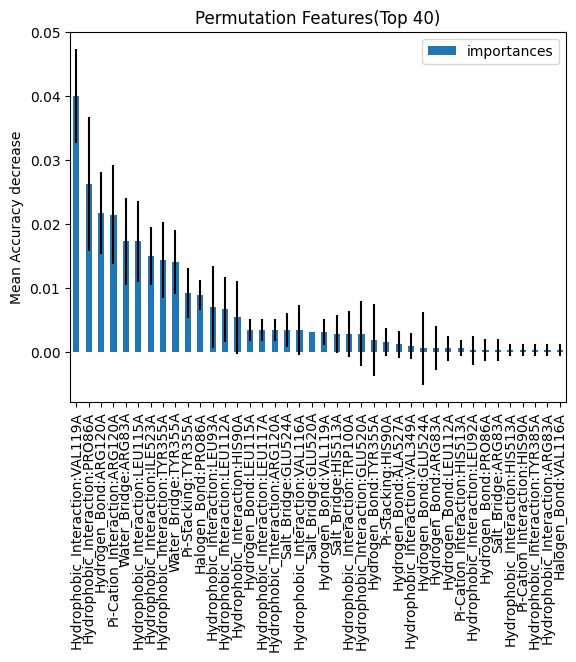

In [10]:
forest_importances["std"] = result.importances_std
forest_importances_per = forest_importances.sort_values("importances",ascending=False).head(40)

fig, ax = plt.subplots()
forest_importances_per.plot.bar(y="importances", yerr="std",ax=ax)
ax.set_title("Permutation Features(Top 40)")
ax.set_ylabel("Mean Accuracy decrease")

Save top 40 features

In [11]:
idx = list(forest_importances_per.index)
idx.append("LABEL")
filtered = rf_data_raw.filter(items=idx)
filtered.to_csv(data_dir/"COX1/cox1_per.csv",sep=",")